In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

In [2]:
df = pd.read_csv('clean_tweet_data.csv')

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_41740/4054853347.py:1: DtypeWarning: Columns (0,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_tweet_data.csv')


In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,type,name,content,handle,date,likeCount,retweetCount,domain,i|e,n|s,t|f,j|p,words_in_tweet,char_in_tweet,sentiment
0,enfj,katy perry,if you wanna know why any human is they way th...,katyperry,2022-10-30 22:15:09+00:00,29840,4575,diplomat,e,n,f,j,52.0,266.0,0.0258
1,enfj,katy perry,"wait, if it’s called a “feed” are we literally...",katyperry,2022-10-29 07:01:46+00:00,10502,881,diplomat,e,n,f,j,13.0,77.0,0.0000
2,enfj,katy perry,heck I pour beer out of my tits (that’s a part...,katyperry,2022-10-27 19:07:44+00:00,3042,297,diplomat,e,n,f,j,41.0,241.0,0.6351
3,enfj,katy perry,The show’s set list is a fun 🎢 through memory...,katyperry,2022-10-27 19:07:21+00:00,3654,336,diplomat,e,n,f,j,53.0,271.0,0.8070
4,enfj,katy perry,Welcoming all my #flatearthers #spaceisfakers ...,katyperry,2022-10-27 19:05:27+00:00,20819,2318,diplomat,e,n,f,j,23.0,192.0,0.3802


In [4]:
df.type.value_counts()

esfp              30609
enfp              18955
esfj              17908
entp              15779
isfp              15555
estp              15106
enfj              10801
istp              10709
isfj              10249
infj               7796
entj               7771
estj               7087
intj               4072
infp               3944
intp               3355
istj               2656
katyperry             5
GarethBale11          2
SamuelLJackson        2
Pink                  1
Name: type, dtype: int64

In [5]:
df = df.drop(index=[49,53,32607,32611,36372,66688,66776,89390,89403,40840])

In [6]:
# create train and test (80/20 split) from the orginal dataframe
train, test = train_test_split(df, test_size=0.2, random_state=123)
# create train and validate (75/25 split) from the train dataframe
train, val = train_test_split(train, test_size=.25, random_state=123)

In [7]:
train.shape, val.shape, test.shape

((109414, 15), (36472, 15), (36472, 15))

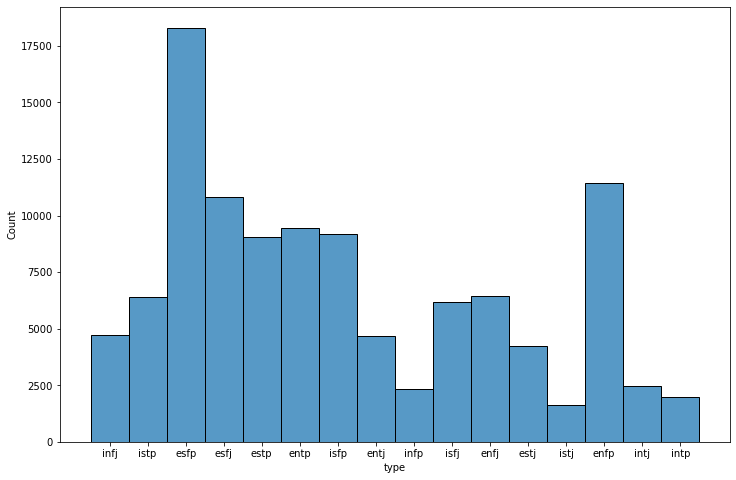

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(train, x='type')
plt.show()

In [9]:
train.head()

,type,name,content,handle,date,likeCount,retweetCount,domain,i|e,n|s,t|f,j|p,words_in_tweet,char_in_tweet,sentiment
67551,infj,j. cole,KOD 4/20 Cover and back https://t.co/2iUaK...,JColeNC,2018-04-18 18:17:34+00:00,380176,192408,diplomat,i,n,f,j,10.0,51.0,0.0000
141842,istp,reggie bush,@ErinvDowning Your take is wrong.,ReggieBush,2021-01-19 18:41:48+00:00,3,0,explorer,i,s,t,p,5.0,33.0,-0.4767
789,esfp,shakira,Discover the new Dance Midnight Muse fragrance...,shakira,2022-07-19 01:27:39+00:00,6324,598,explorer,e,s,f,p,18.0,183.0,0.0000
178257,esfj,paula abdul,Sneak peek on what’s to come this week on my @...,PaulaAbdul,2021-09-29 00:28:29+00:00,128,36,sentinel,e,s,f,j,23.0,159.0,0.3774
89510,estp,samuel l. jackson,Dementia devastates lives – my own family stru...,SamuelLJackson,2019-09-25 00:33:41+00:00,6384,2112,explorer,e,s,t,p,34.0,244.0,0.0337


<AxesSubplot:xlabel='domain', ylabel='Count'>

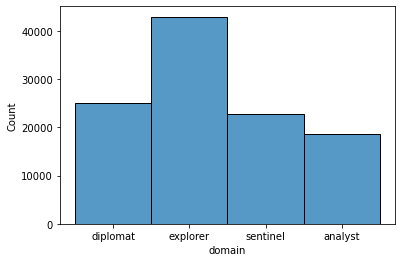

In [10]:
sns.histplot(train, x='domain')

In [11]:
train[train['i|e'] == 'i'].sentiment.mean(), train[train['i|e'] == 'e'].sentiment.mean()

(0.3164123008267286, 0.2964832431125544)

In [12]:
train[train['n|s'] == 'n'].sentiment.mean(), train[train['n|s'] == 's'].sentiment.mean()

(0.2947054276013918, 0.3082464261836735)

In [13]:
train[train['t|f'] == 't'].sentiment.mean(), train[train['t|f'] == 'f'].sentiment.mean()

(0.28254734691831296, 0.31450532032745293)

In [14]:
train[train['j|p'] == 'j'].sentiment.mean(), train[train['j|p'] == 'p'].sentiment.mean()

(0.3457263028861257, 0.2769543639215894)

In [15]:
train[train.type == 'isfj'].sentiment.mean(), train[train.type == 'entp'].sentiment.mean()

(0.36874961215255386, 0.23297506620061406)

In [16]:
{'diplomat':train[train.domain == 'diplomat'].sentiment.mean(), 
 'explorer':train[train.domain == 'explorer'].sentiment.mean(), 
 'analyst':train[train.domain == 'analyst'].sentiment.mean(),
 'sentinel':train[train.domain == 'sentinel'].sentiment.mean()}

{'diplomat': 0.317404655255164,
 'explorer': 0.28192362921243447,
 'analyst': 0.26417113191306235,
 'sentinel': 0.3577578051129446}

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_in_tweet', ylabel='sentiment'>

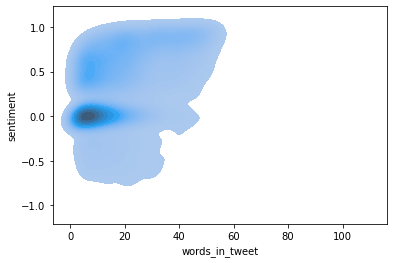

In [17]:
sns.kdeplot(train[train.domain == 'diplomat'].words_in_tweet, train[train.domain == 'diplomat'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_in_tweet', ylabel='sentiment'>

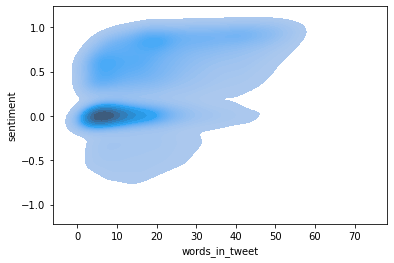

In [18]:
sns.kdeplot(train[train.domain == 'sentinel'].words_in_tweet, train[train.domain == 'sentinel'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_in_tweet', ylabel='sentiment'>

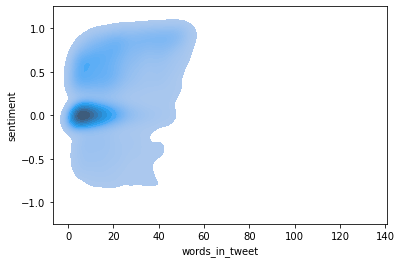

In [19]:
sns.kdeplot(train[train.domain == 'analyst'].words_in_tweet, train[train.domain == 'analyst'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_in_tweet', ylabel='sentiment'>

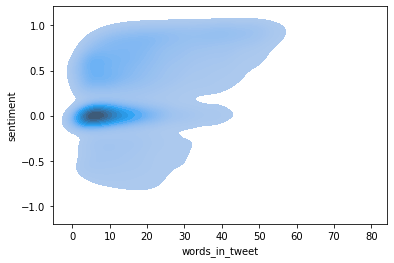

In [20]:
sns.kdeplot(train[train.domain == 'explorer'].words_in_tweet, train[train.domain == 'explorer'].sentiment, levels=30, shade=True)

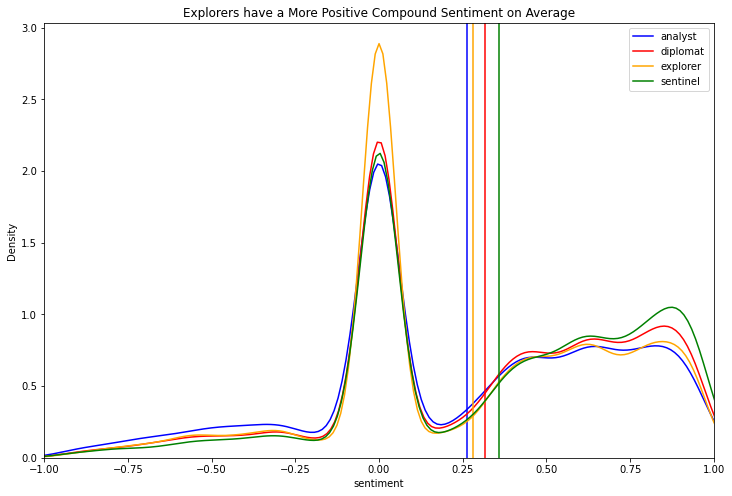

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(train[train.domain == 'analyst'].sentiment, label='analyst', color='blue')
plt.axvline(train[train.domain == 'analyst'].sentiment.mean(), color='blue')
sns.kdeplot(train[train.domain == 'diplomat'].sentiment, label='diplomat', color='red')
plt.axvline(train[train.domain == 'diplomat'].sentiment.mean(), color='red')
sns.kdeplot(train[train.domain == 'explorer'].sentiment, label='explorer', color='orange')
plt.axvline(train[train.domain == 'explorer'].sentiment.mean(), color='orange')
sns.kdeplot(train[train.domain == 'sentinel'].sentiment, label='sentinel', color='green')
plt.axvline(train[train.domain == 'sentinel'].sentiment.mean(), color='green')
plt.xlim(-1,1)
plt.title('Explorers have a More Positive Compound Sentiment on Average')
plt.legend()
plt.show()

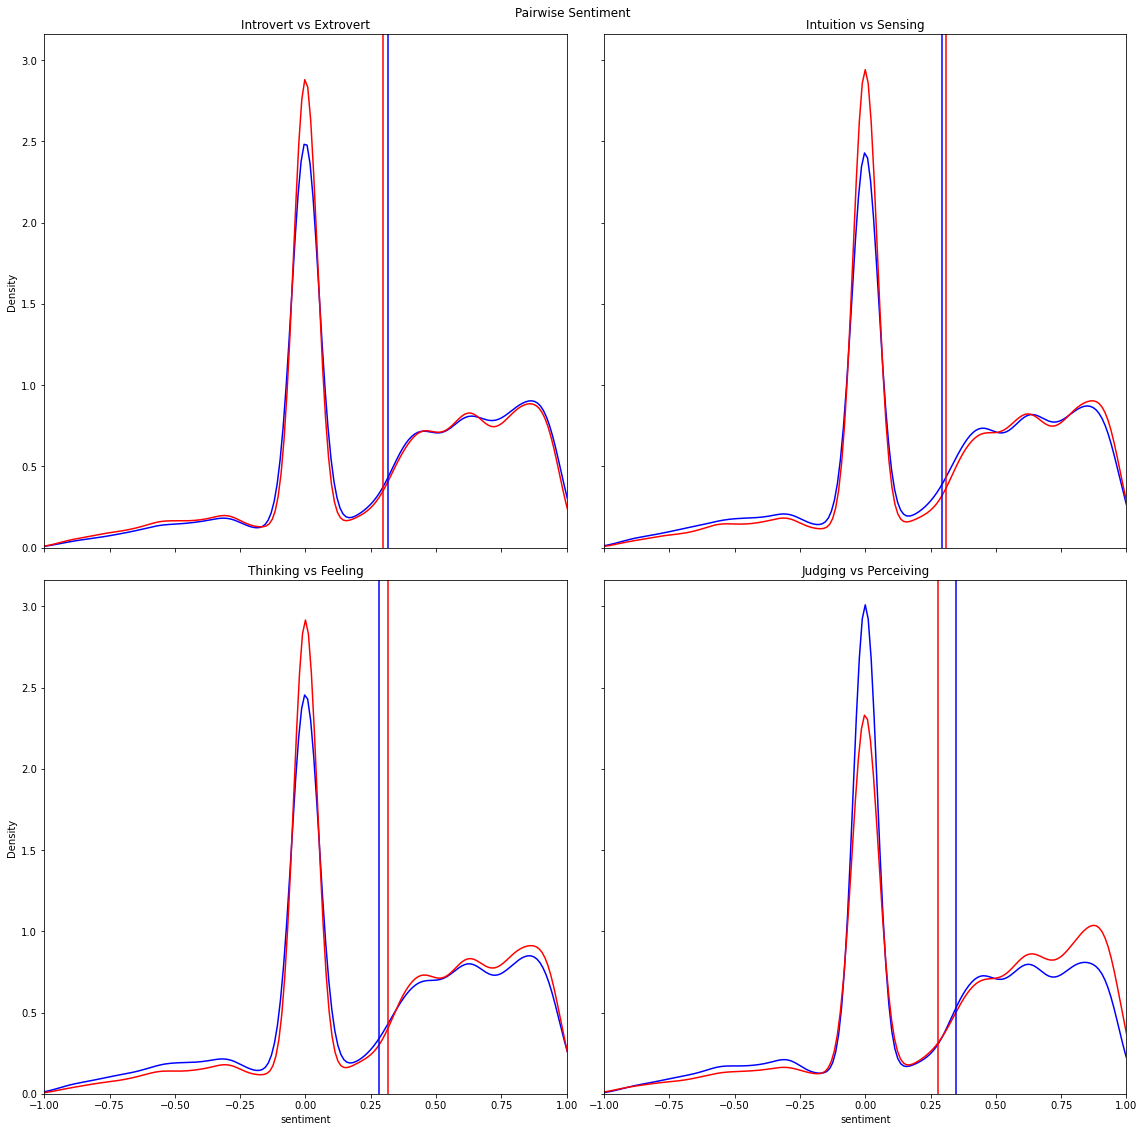

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,16))

sns.kdeplot(ax=axes[0,0], data=train[train['i|e'] == 'i'].sentiment,
            label='introvert', color='blue')
sns.kdeplot(ax=axes[0,0], data=train[train['i|e'] == 'e'].sentiment,
            label='extrovert', color='red')
axes[0,0].axvline(train[train['i|e'] == 'i'].sentiment.mean(), color='blue')
axes[0,0].axvline(train[train['i|e'] == 'e'].sentiment.mean(), color='red')
axes[0,0].set_xlim(-1,1)
axes[0,0].set_title('Introvert vs Extrovert')



sns.kdeplot(ax=axes[0,1], data=train[train['n|s'] == 'n'].sentiment,
            label='intuition', color='blue')
sns.kdeplot(ax=axes[0,1], data=train[train['n|s'] == 's'].sentiment,
            label='sensing', color='red')
axes[0,1].axvline(train[train['n|s'] == 'n'].sentiment.mean(), color='blue')
axes[0,1].axvline(train[train['n|s'] == 's'].sentiment.mean(), color='red')
axes[0,1].set_xlim(-1,1)
axes[0,1].set_title('Intuition vs Sensing')




sns.kdeplot(ax=axes[1,0], data=train[train['t|f'] == 't'].sentiment,
            label='thinking', color='blue')
sns.kdeplot(ax=axes[1,0], data=train[train['t|f'] == 'f'].sentiment,
            label='feeling', color='red')
axes[1,0].axvline(train[train['t|f'] == 't'].sentiment.mean(), color='blue')
axes[1,0].axvline(train[train['t|f'] == 'f'].sentiment.mean(), color='red')
axes[1,0].set_xlim(-1,1)
axes[1,0].set_title('Thinking vs Feeling')



sns.kdeplot(ax=axes[1,1], data=train[train['j|p'] == 'p'].sentiment,
            label='perceiving', color='blue')
sns.kdeplot(ax=axes[1,1], data=train[train['j|p'] == 'j'].sentiment,
            label='judging', color='red')
axes[1,1].axvline(train[train['j|p'] == 'j'].sentiment.mean(), color='blue')
axes[1,1].axvline(train[train['j|p'] == 'p'].sentiment.mean(), color='red')
axes[1,1].set_xlim(-1,1)
axes[1,1].set_title('Judging vs Perceiving')



fig.suptitle('Pairwise Sentiment')
plt.tight_layout()
# plt.legend()
plt.show()

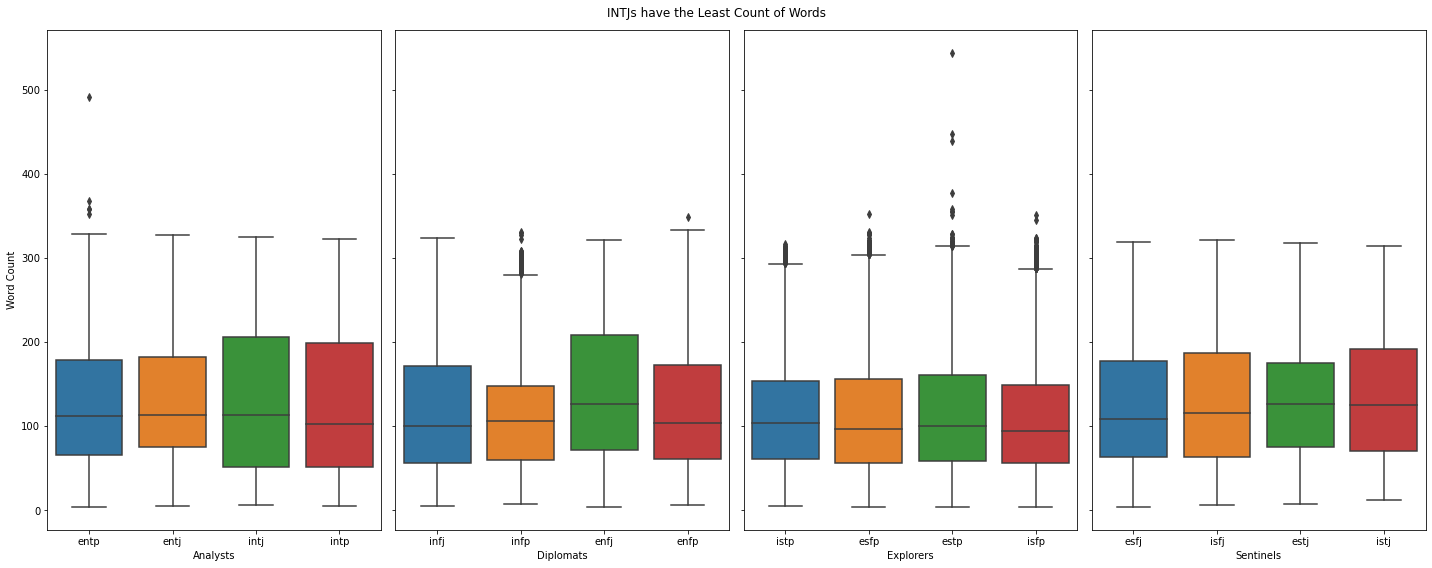

In [23]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
sns.boxplot(ax=axes[0], data=train[train.domain == 'analyst'], x='type', y='char_in_tweet')
axes[0].set_ylabel('Word Count')
axes[0].set_xlabel('Analysts')
sns.boxplot(ax=axes[1], data=train[train.domain == 'diplomat'], x='type', y='char_in_tweet')
axes[1].set_ylabel('')
axes[1].set_xlabel('Diplomats')
sns.boxplot(ax=axes[2], data=train[train.domain == 'explorer'], x='type', y='char_in_tweet')
axes[2].set_ylabel('')
axes[2].set_xlabel('Explorers')
sns.boxplot(ax=axes[3], data=train[train.domain == 'sentinel'], x='type', y='char_in_tweet')
axes[3].set_ylabel('')
axes[3].set_xlabel('Sentinels')

fig.suptitle('INTJs have the Least Count of Words')
plt.tight_layout()
plt.show()

In [26]:
import emot.emo_unicode

In [30]:
from emot.emo_unicode import EMOJI_UNICODE, EMOTICONS_EMO

In [31]:
def basic_clean(text,regexfilter=r'[^a-z0-9\'\s]'):
    '''   
    Filters out all special characters if you need to edit then supply a new regex filter 
    
    
    
    
    '''
    #make a copy and begin to transform it
    newtext = text.lower()

    #encode into ascii then decode
    newtext = unicodedata.normalize('NFKD', newtext)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')

    #use re.sub to remove special characters
    newtext = re.sub(fr'{regexfilter}', ' ', newtext)

In [167]:
# Converting emojis to words
def convert_emojis(text):
    for emot in EMOJI_UNICODE:
        text = text.replace(emot, "_".join(EMOJI_UNICODE[emot].replace(",","").replace(":","").split()))
        text = text.replace(':','').replace('_',' ')
    return text
# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(re.escape(emot),EMOTICONS_EMO[emot],text)
    return text

In [162]:
sample = 'some text here :-) :sweat_smile: '

In [163]:
EMOTICONS_EMO[':-)']

'Happy face smiley'

In [164]:
convert_emoticons(sample)

'some text here Happy face smiley :sweat_smile: '

In [166]:
convert_emojis(convert_emoticons(sample))

'some text here Happy face smiley sweat smile '

In [168]:
# text = sample
# for emot in EMOTICONS_EMO:
#     text = re.sub(re.escape(emot),
#                   EMOTICONS_EMO[emot],
#                   text)
# text